# Titanic Survival Prediction 
by Dev Patel

In this project I will analyse the popular [titanic dataset from kaggle](https://www.kaggle.com/c/titanic) and predict a classification - (survival or deceased) by implementing logistic regression using Numpy, Pandas, Matplotlib, Seaborn, and SciKitLearn.

** Note: I will be using a semi-cleaned version of above dataset. **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Getting the data**

In [2]:
# Extracting the data from the csv file

train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Info of the dataframe

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Exploratory Data Analysis**

<AxesSubplot:>

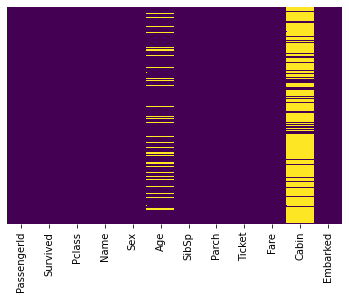

In [4]:
# Creating a heatmap to see what data is missing

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

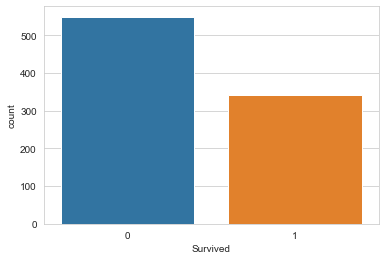

In [6]:
# Countplot for the 'Survived' column

sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

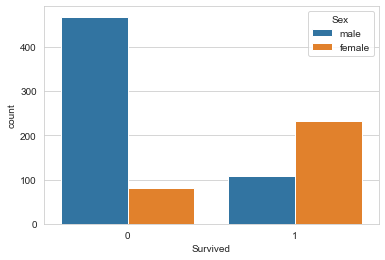

In [7]:
# Count of survival based on gender

sns.countplot(x='Survived', data=train, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

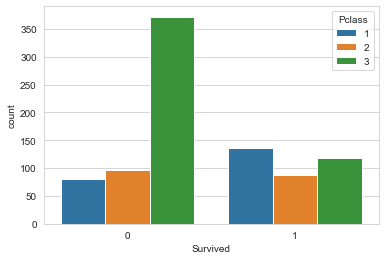

In [8]:
# Count of survival based on the passenger class

sns.countplot(x='Survived', data=train, hue='Pclass')

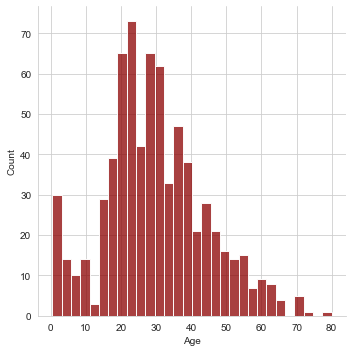

In [9]:
# Viewing the ages of people on the titanic

sns.displot(train['Age'].dropna(), color='darkred', bins=30)

In [10]:
# Interactive plot for the age of passengers

import cufflinks as cf
cf.go_offline()
train['Age'].iplot(kind='hist', bins=50)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

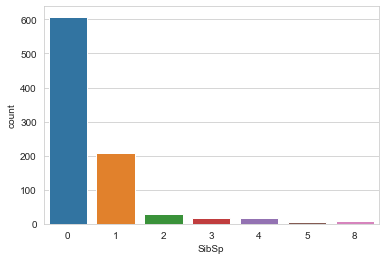

In [11]:
# No. of siblings/spouses on board

sns.countplot(x='SibSp', data=train)

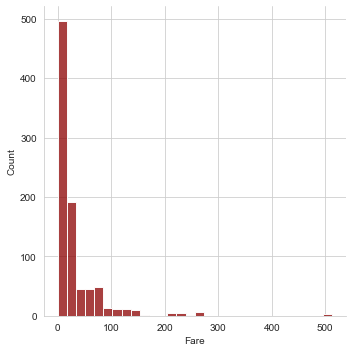

In [12]:
# The fare people paid to be on board

sns.displot(train['Fare'].dropna(), color='darkred', bins=30)

**Data Cleaning**

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

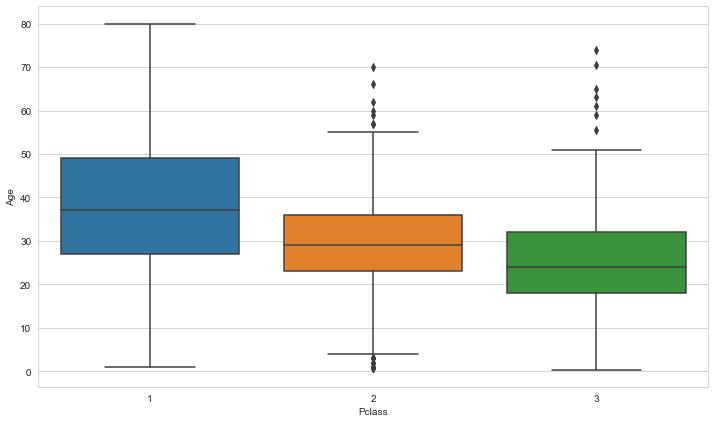

In [13]:
# Checking the avg age by passenger class through a box plot

plt.figure(figsize=(12, 7))
sns.boxplot(data=train, x='Pclass', y='Age')

In [14]:
# In the above boxplot it is observed that wealthier passengers in the higher classes tend to be older
# Now, using these average age values to impute the missing data based on Pclass for Age.

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

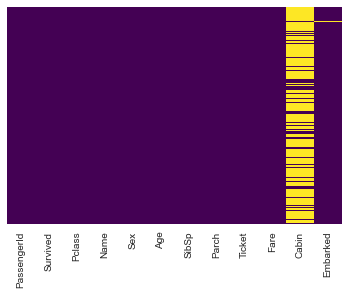

In [15]:
# Checking the heatmap after imputing the missing Age data

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
# Dropping the 'Cabin' column

train.drop('Cabin', axis=1, inplace=True)

In [17]:
# using pandas' dropna method to drop the missing rows in 'embarked' column

train.dropna(inplace=True)

<AxesSubplot:>

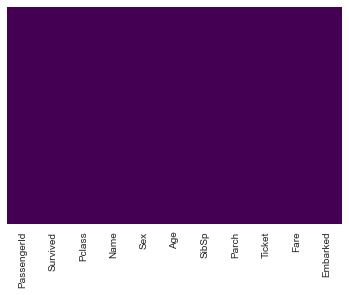

In [18]:
# On checking the heatmap again, we find that we have now dealt with all the missing data

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
# Converting the categorical features to dummy variables and
# making the train dataframe ready for logistic regression algorithm 

sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


**Logistic Regression Model**

In [20]:
# Splitting the data into training and testing data

X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = train['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [21]:
# Training the logistic regression model

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=500)
logReg.fit(X_train, y_train)
predictions = logReg.predict(X_test)

In [22]:
# Evaluating the model

from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions)) # Confusion Matrix

[[150  13]
 [ 32  72]]


In [23]:
# Classification report
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

